## Gender Classification Using CNN ##

## machine learning model processing 
* Problem Definition -> Classification of Gender
* Data Preprocessing -> Prepare Features and Labels, Data Scaling
* Model Selection -> Logistic Regression, SVM, Random Forest
* Model Evaluation -> 1. Evaluate on test or validation data, 2. Metrics (Accuracy, Precision, F1-Score)
* Model Training -> Fit the model to the train data
* Model Visualization -> Display the Confusion Matrix
* Hyperparameter Tuning -> Grid Search, Randomised Search
* Model Validation ->Validate model generalization on unseen data
* Model Save -> Keras

**Problem Definition::**

*Objective: Classify gender (Male/Female) based on input features (e.g., facial measurements, extracted image features).
Type: Binary Classification*

In [93]:
# Importing Necessary Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score

In [94]:
# Data Preprocessing

# Define paths
train_path = 'dataset/train'
val_path = 'dataset/val'

# Image dimensions
img_height, img_width = 128, 128

# Data generators with normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for consistent predictions
)


Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [95]:
# Model Selection
def shallow_cnn():  # Model 1
    model = Sequential([
        Input(shape=(128, 128, 3)),  
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def medium_cnn():  # Model 2
    model = Sequential([
        Input(shape=(128, 128, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

def deep_vgg_like_cnn():  # Model 3
    model = Sequential([
        Input(shape=(128, 128, 3)),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [96]:
# Train the Models
models = {
    "Shallow CNN": shallow_cnn(),
    "Medium CNN": medium_cnn(),
    "Deep VGG-like CNN": deep_vgg_like_cnn()
}

histories = {}
results = {}

for name, model in models.items():
    print(f"\n🔁 Training: {name}")
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        verbose=1
    )

    loss, acc = model.evaluate(val_generator, verbose=0)
    print(f"✅ {name} - Test Accuracy: {acc:.4f}")
    
    histories[name] = history
    results[name] = (model, acc) 


🔁 Training: Shallow CNN
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 52s 836ms/step - accuracy: 0.8209 - loss: 1.3391 - val_accuracy: 0.8033 - val_loss: 0.4794
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.8650 - loss: 0.3016 - val_accuracy: 0.8626 - val_loss: 0.3531
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9185 - loss: 0.1974 - val_accuracy: 0.8839 - val_loss: 0.3609
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9500 - loss: 0.1269 - val_accuracy: 0.8815 - val_loss: 0.3598
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.9852 - loss: 0.0639 - val_accuracy: 0.8839 - val_loss: 0.4016
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9961 - loss: 0.0296 - val_accuracy: 0.8815 - val_loss: 0.4199
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.9986 - loss: 0.0183 - val_accuracy: 0.8649 - val_loss: 0.4790
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9999 

In [106]:
#Model Validation
loss, acc = model.evaluate(val_generator, verbose=0)
print(f"✅ Final Test Accuracy: {acc:.4f}")

✅ Final Test Accuracy: 0.8649


In [108]:
# Get true labels and predicted probabilities
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step


In [110]:
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Male', 'Female']))

✅ Classification Report:
              precision    recall  f1-score   support

        Male       0.68      0.53      0.60        79
      Female       0.90      0.94      0.92       343

    accuracy                           0.86       422
   macro avg       0.79      0.74      0.76       422
weighted avg       0.86      0.86      0.86       422



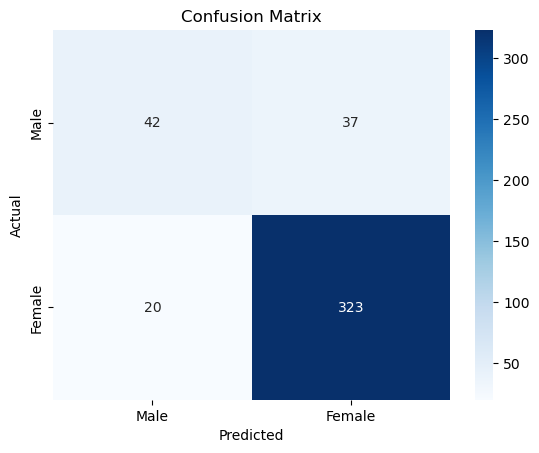

In [112]:
# Visualization
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# Data loader function
def get_data(batch_size):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    val_gen = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )
    return train_gen, val_gen


In [129]:
learning_rates = [0.001, 0.0005, 0.0001]
batch_sizes = [8]

# Hyperparameter tuning loop
best_acc = 0
best_config = None
best_model = None
img_size = (img_height, img_width)
for lr in learning_rates:
    for batch in batch_sizes:
        print(f"\n🔧 Training with LR={lr}, Batch Size={batch}")
        
        train_gen, val_gen = get_data(batch)
        model = shallow_cnn(lr)
        
        model.fit(train_gen, epochs=10, validation_data=val_gen, verbose=0)
        
        # Predict
        val_gen.reset()
        preds = model.predict(val_gen, verbose=0)
        y_pred = (preds > 0.5).astype(int).reshape(-1)
        y_true = val_gen.classes
        
        # Metrics
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        print(f"✅ Accuracy: {acc:.4f} | F1 Score: {f1:.4f} | Recall: {recall:.4f}")
        
        if acc > best_acc:
            best_acc = acc
            best_config = (lr, batch)
            best_model = model

print(f"\n🏆 Best Accuracy: {best_acc:.4f} with LR={best_config[0]}, Batch Size={best_config[1]}")


🔧 Training with LR=0.001, Batch Size=8
Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
✅ Accuracy: 0.8839 | F1 Score: 0.9313 | Recall: 0.9679

🔧 Training with LR=0.0005, Batch Size=8
Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


C:\anaconda navigator\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Accuracy: 0.8791 | F1 Score: 0.9283 | Recall: 0.9621

🔧 Training with LR=0.0001, Batch Size=8
Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


C:\anaconda navigator\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Accuracy: 0.8863 | F1 Score: 0.9312 | Recall: 0.9475

🏆 Best Accuracy: 0.8863 with LR=0.0001, Batch Size=8


In [131]:
# Save the model 
model.save("final_best_gender_model.h5")
print("✅ Best tuned model loaded from: final_best_gender_model.h5")


✅ Best tuned model loaded from: final_best_gender_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


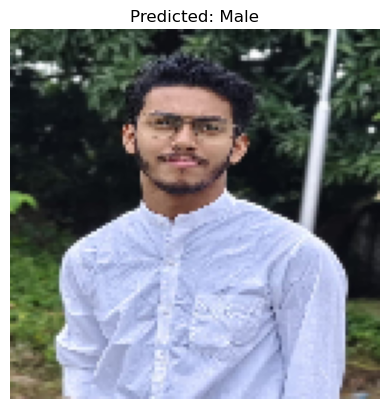

Prediction Score: 0.9997


In [140]:
from tensorflow.keras.preprocessing import image

# 1. Load the trained model
model = load_model("final_best_gender_model.h5")

# 2. Load and preprocess a test image
img_path = r"C:\Users\LENOVO\OneDrive\AICTE\COMSYS Projects\Gender Classification\Profile.jpeg"  # 🔁 Replace with your image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 128, 128, 3)

# 3. Predict
pred = model.predict(img_array)
gender = "Male" if pred[0][0] > 0.5 else "Female"

# 4. Display result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {gender}")
plt.show()

# 5. Print raw confidence
print(f"Prediction Score: {pred[0][0]:.4f}")